# Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from utils import * 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False

# Read data and data pre-processing

In [2]:
weather_raw = pd.read_csv('input_weather.csv')
windspeed_raw = pd.read_csv('output_windspeed.csv')
weather_data = np.array(weather_raw)
wind_data=np.array(windspeed_raw)

L=len(weather_data)
print(L)

61549


In [3]:
X_train_df = weather_data[0:49239,0:]
y_train_df = wind_data[0:49239,:]

X_test_df = weather_data[49239:,0:]
y_test_df = wind_data[49239:,:]

In [4]:
wind_data[49239:,0].shape

(12310,)

In [5]:
# Standardization
mean, std = X_train_df.mean(), X_train_df.std()

X_train_df = (X_train_df - mean)/std
X_test_df  = (X_test_df - mean)/std

X_train = X_train_df
y_train = y_train_df
X_test = X_test_df

print(X_train.shape,y_train.shape)

(49239, 8) (49239, 1)


# Build the model

In [6]:
# set hyperparameters
n_neuron       = 192
activation     = 'relu'
num_epochs     = 1000
learning_rate  = 0.0001
minibatch_size = 32
model_num      = 1

In [7]:
model = Sequential()

model.add(Dense(n_neuron,  activation=activation,input_shape=(X_train.shape[1],))) #  the 1st hidden layer 
model.add(Dense(n_neuron,  activation=activation)) # the 2nd hidden layer
model.add(Dense(n_neuron,  activation=activation)) # the 3rd hidden layer
model.add(Dense(n_neuron,  activation=activation)) # the 4th hidden layer
model.add(Dense(n_neuron,  activation=activation)) # the 5th hidden layer
model.add(Dense(y_train.shape[1],  activation='linear')) # the output layer


model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

2022-12-23 07:59:45.616472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               1728      
                                                                 
 dense_1 (Dense)             (None, 192)               37056     
                                                                 
 dense_2 (Dense)             (None, 192)               37056     
                                                                 
 dense_3 (Dense)             (None, 1)                 193       
                                                                 
Total params: 76,033
Trainable params: 76,033
Non-trainable params: 0
_________________________________________________________________


In [9]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


history = model.fit(X_train, y_train, 
                    batch_size      = minibatch_size,
                    epochs          = num_epochs,
                    validation_split= 0.2, 
                    verbose         = 1,
                    callbacks       = [early_stop])


Epoch 1/1000
1231/1231 [==============================] - 2s 1ms/step - loss: 58.8281 - val_loss: 47.5395
Epoch 2/1000
1231/1231 [==============================] - 1s 989us/step - loss: 48.8948 - val_loss: 47.4555
Epoch 3/1000
1231/1231 [==============================] - 1s 990us/step - loss: 48.8481 - val_loss: 47.4620
Epoch 4/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 48.7861 - val_loss: 47.4633
Epoch 5/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 48.7349 - val_loss: 47.4163
Epoch 6/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 48.6554 - val_loss: 47.3400
Epoch 7/1000
1231/1231 [==============================] - 2s 2ms/step - loss: 48.6302 - val_loss: 47.3488
Epoch 8/1000
1231/1231 [==============================] - 2s 1ms/step - loss: 48.5433 - val_loss: 47.4054
Epoch 9/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 48.4837 - val_loss: 47.1555
Epoch 10/1000
1231/1231 [=================

1231/1231 [==============================] - 1s 1ms/step - loss: 32.5064 - val_loss: 31.8801
Epoch 78/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 32.4922 - val_loss: 32.4312
Epoch 79/1000
1231/1231 [==============================] - 1s 997us/step - loss: 32.3146 - val_loss: 32.0721
Epoch 80/1000
1231/1231 [==============================] - 1s 994us/step - loss: 32.1439 - val_loss: 33.9684
Epoch 81/1000
1231/1231 [==============================] - 1s 994us/step - loss: 32.2379 - val_loss: 31.7655
Epoch 82/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 31.8521 - val_loss: 31.9690
Epoch 83/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 32.0206 - val_loss: 33.4165
Epoch 84/1000
1231/1231 [==============================] - 1s 998us/step - loss: 31.6274 - val_loss: 32.9385
Epoch 85/1000
1231/1231 [==============================] - 1s 995us/step - loss: 31.6099 - val_loss: 31.1976
Epoch 86/1000
1231/1231 [================

1231/1231 [==============================] - 1s 1ms/step - loss: 24.1818 - val_loss: 28.8396
Epoch 153/1000
1231/1231 [==============================] - 1s 994us/step - loss: 24.5811 - val_loss: 29.8537
Epoch 154/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 24.1708 - val_loss: 27.2837
Epoch 155/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 24.1227 - val_loss: 26.9595
Epoch 156/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 24.1574 - val_loss: 27.2266
Epoch 157/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 24.0896 - val_loss: 27.7892
Epoch 158/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 23.9384 - val_loss: 27.1840
Epoch 159/1000
1231/1231 [==============================] - 1s 1ms/step - loss: 24.1048 - val_loss: 30.6014
Epoch 160/1000
1231/1231 [==============================] - 1s 997us/step - loss: 23.9236 - val_loss: 30.7652
Epoch 161/1000
1231/1231 [=============

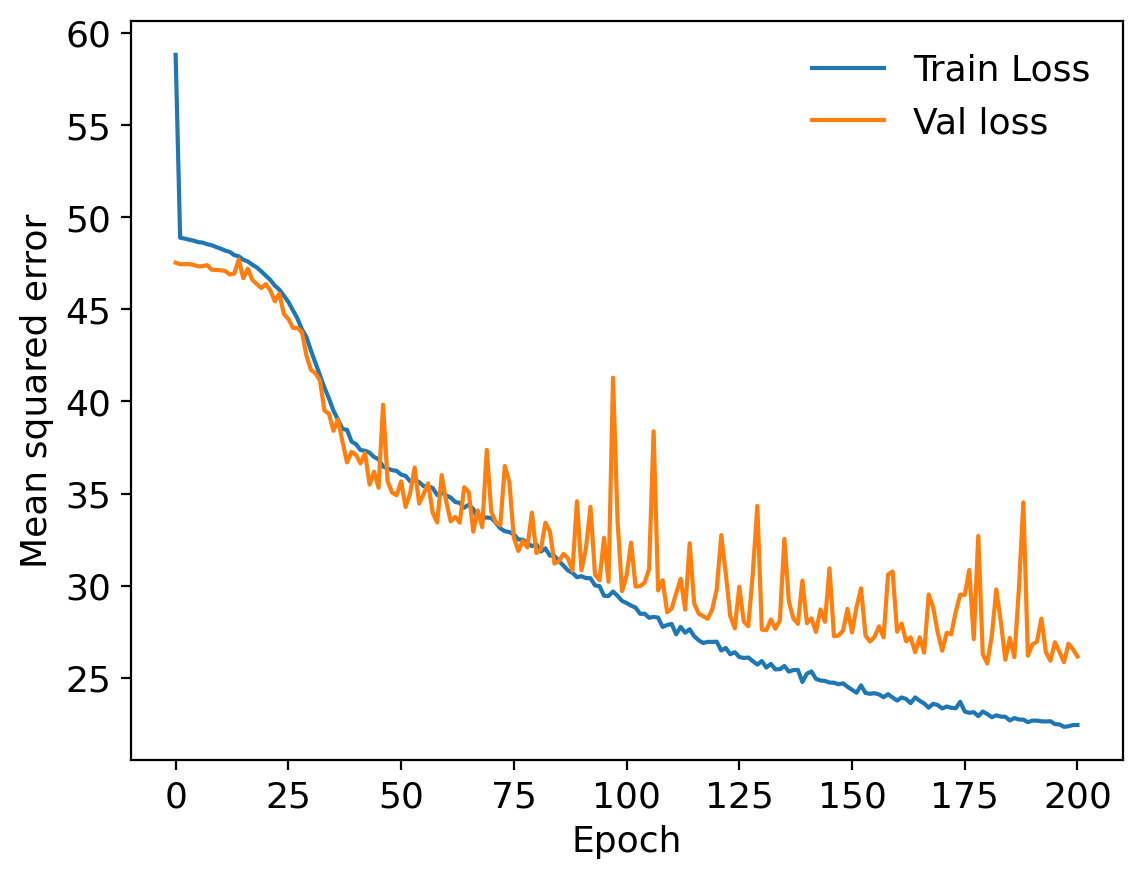

In [10]:
plot_history(history)

# Evaluate the trained model

385/385 [==============================] - 0s 628us/step


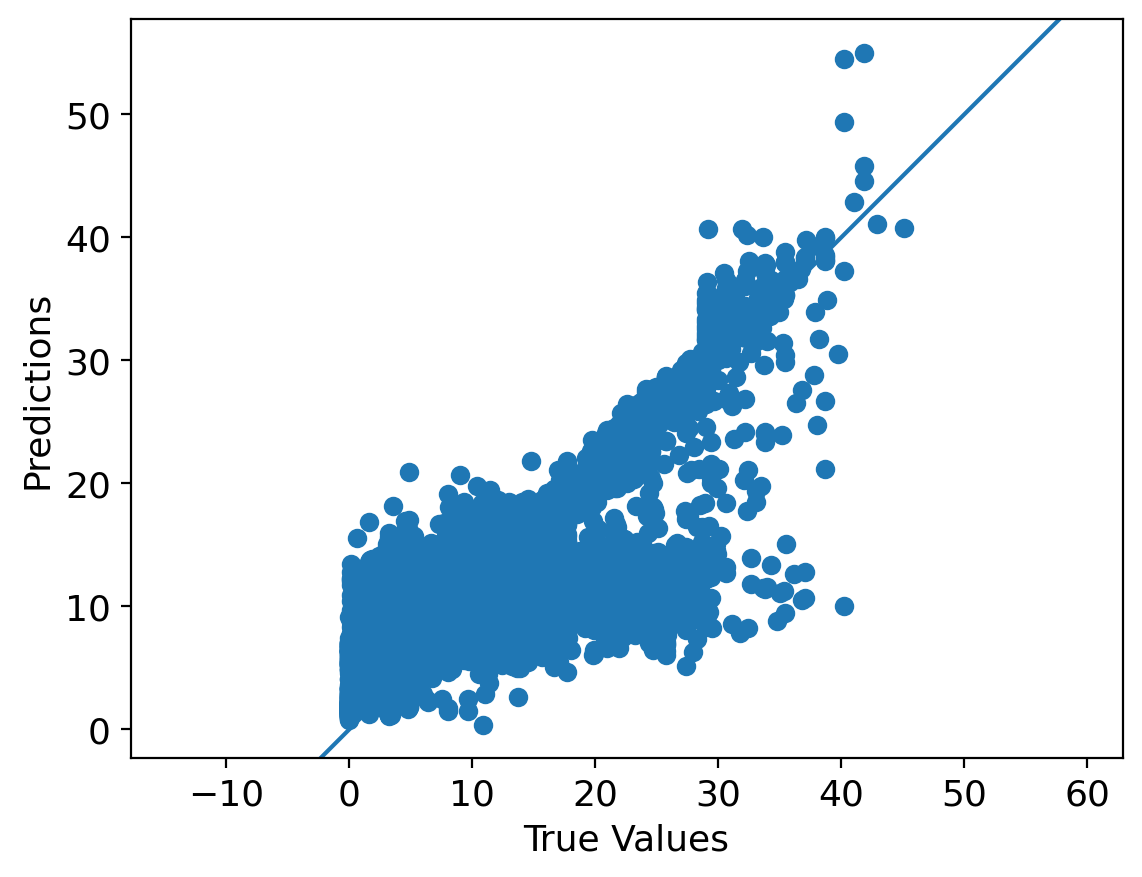

In [10]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test_df, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test_df,test_predictions)

0.5540305464645058

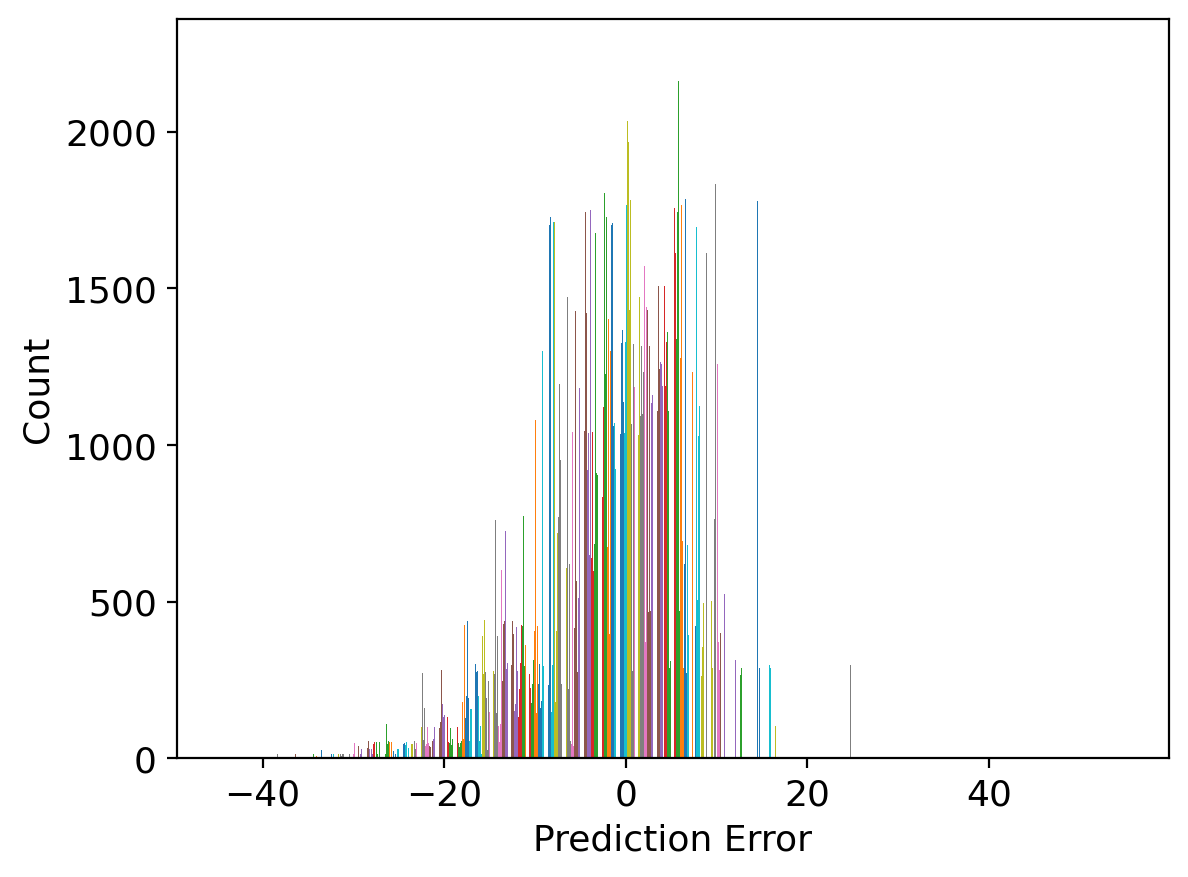

In [12]:
error = test_predictions - y_test_df
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [29]:
y_test_df_1d = y_test_df.reshape(y_test_df.shape[0],)

In [30]:
np.corrcoef(y_test_df_1d,test_predictions)[0,1]

0.7458941913556059